In [45]:
import pandas as pd
import numpy as np
from env import host, user, password
from pydataset import data
import matplotlib.pyplot as plt

In [2]:
# Create a function named get_db_url. It should accept a username, hostname, password, and database name and 
# return a url connection string formatted like in the example at the start of this lesson.

def get_db_url(user, host, password, dbname):
    return f'mysql+pymysql://{user}:{password}@{host}/{dbname}'

In [3]:
# Use your function to obtain a connection to the employees database.
url = get_db_url(user, host, password, 'employees')

In [4]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [5]:
# Read the employees and titles tables into two separate DataFrames.
employees_df = pd.read_sql('SELECT * FROM employees', url)
titles_df = pd.read_sql('SELECT * FROM titles', url)

In [6]:
# How many rows and columns do you have in each DataFrame? Is that what you expected?
employees_df.shape

(300024, 6)

In [7]:
titles_df.shape

(443308, 4)

In [8]:
# Display the summary statistics for each DataFrame.
employees_df.describe()

,emp_no
count,300024.000000
mean,253321.763392
std,161828.235540
min,10001.000000
25%,85006.750000
50%,249987.500000
75%,424993.250000
max,499999.000000


In [9]:
titles_df.describe()

,emp_no
count,443308.000000
mean,253075.034430
std,161853.292613
min,10001.000000
25%,84855.750000
50%,249847.500000
75%,424891.250000
max,499999.000000


In [10]:
# How many unique titles are in the titles DataFrame?
pd.read_sql('SELECT DISTINCT title FROM titles', url).shape[0]

7

In [11]:
# What is the oldest date in the to_date column?
pd.read_sql('SELECT to_date FROM titles ORDER BY to_date ASC LIMIT 1', url)

,to_date
0,1985-03-01


In [12]:
# What is the most recent date in the to_date column?
pd.read_sql('SELECT max(to_date) FROM titles WHERE to_date NOT LIKE "%9999%"', url)

,max(to_date)
0,2002-08-01


In [13]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [14]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [15]:
# What is the result of using a right join on the DataFrames?
users.merge(roles, how='right', left_on='role_id', right_on='id')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [16]:
# What is the result of using an outer join on the DataFrames?
users.merge(roles, how='outer', left_on='role_id', right_on='id')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [17]:
# What happens if you drop the foreign keys from the DataFrames and try to merge them?
users.merge(roles, how='outer')

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN
6,1,admin,NaN
7,2,author,NaN
8,3,reviewer,NaN
9,4,commenter,NaN


In [18]:
# Load the mpg dataset from PyDataset.
mpg = data('mpg')

In [19]:
# Output and read the documentation for the mpg dataset.
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [20]:
# How many rows and columns are in the dataset?
mpg.shape

(234, 11)

In [21]:
# Check out your column names and perform any cleanup you may want on them.
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [22]:
mpg = mpg.rename(columns={'displ': 'displacement', 
                          'cyl': 'cylinder', 
                          'trans': 'transmission',
                          'drv': 'drivetrain',
                          'cty': 'city',
                          'hwy': 'highway',
                          'fl': 'fuel type'})

In [23]:
mpg

,manufacturer,model,displacement,year,cylinder,transmission,drivetrain,city,highway,fuel type,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [24]:
# Display the summary statistics for the dataset.
mpg.describe()

,displacement,year,cylinder,city,highway
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [25]:
# How many different manufacturers are there?
len(mpg['manufacturer'].unique())

15

In [26]:
# How many different models are there?
len(mpg['model'].unique())

38

In [27]:
# Create a column named mileage_difference like you did in the DataFrames exercises; this column should contain
# the difference between highway and city mileage for each car.

mpg['mileage_difference'] = mpg['highway'] - mpg['city']

In [28]:
# Create a column named average_mileage like you did in the DataFrames exercises; this is the mean of the city 
# and highway mileage.

mpg['average_mileage'] = (mpg['city'] + mpg['highway'])/2

In [29]:
# Create a new column on the mpg dataset named is_automatic that holds boolean values denoting whether the car
# has an automatic transmission.

mpg['is_automatic'] = mpg['transmission'].str.contains('auto')

In [30]:
# Using the mpg dataset, find out which which manufacturer has the best miles per gallon on average?

manu_miles = mpg.groupby('manufacturer').average_mileage.agg('mean')
manu_miles.nlargest(1)

manufacturer
honda    28.5
Name: average_mileage, dtype: float64

In [31]:
# Do automatic or manual cars have better miles per gallon?

trans_miles = mpg.groupby('is_automatic').average_mileage.agg('mean')
trans_miles

is_automatic
False    22.227273
True     19.130573
Name: average_mileage, dtype: float64

In [32]:
# Use your get_db_url function to help you explore the data from the chipotle database.

chipotle = get_db_url(user, host, password, 'chipotle')

In [33]:
# What is the total price for each order?
orders_df = pd.read_sql('SELECT * FROM orders', chipotle)

In [34]:
orders_df.item_price = orders_df.item_price.str.replace('$', '').replace().astype('float')

In [54]:
orders_df.groupby('order_id').item_price.sum()

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [37]:
# What are the most popular 3 items?

orders_df.groupby('item_name').quantity.sum().nlargest(3)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

In [55]:
# Which item has produced the most revenue?

orders_df.groupby('item_name').item_price.sum().nlargest(1)

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64

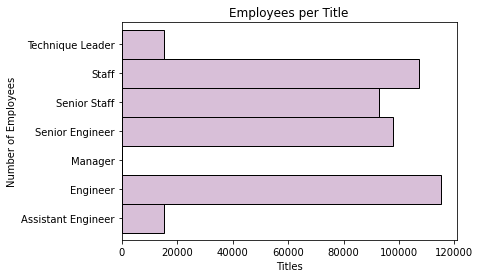

In [48]:
# Using the titles DataFrame, visualize the number of employees with each title.
titles_df.groupby('title').emp_no.count().plot.barh(color='thistle', width=1, ec='black')

plt.title('Employees per Title')
plt.xlabel('Titles')
plt.ylabel('Number of Employees')

plt.show()

In [50]:
# Join the employees and titles DataFrames together.

emps_and_title = employees_df.merge(titles_df, how='inner', on='emp_no')
emps_and_title.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


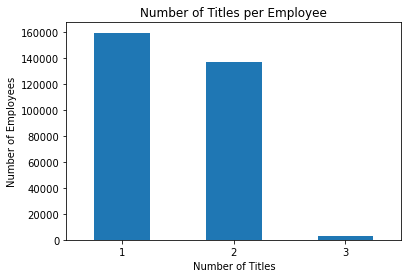

In [66]:
# Visualize how frequently employees change titles.

emps_and_title.groupby('emp_no').title.count().value_counts().plot(kind='bar', rot=0)

plt.title('Number of Titles per Employee')
plt.xlabel('Number of Titles')
plt.ylabel('Number of Employees')

plt.show()

In [70]:
# For each title, find the hire date of the employee that was hired most recently with that title.

emps_and_title.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

In [71]:
# Write the code necessary to create a cross tabulation of the number of titles by department. 
# (Hint: this will involve a combination of SQL code to pull the necessary data and python/pandas code to 
# perform the manipulations.)

emps_and_title.groupby('emp_no').title.count()

emp_no
10001     1
10002     1
10003     1
10004     2
10005     2
         ..
499995    1
499996    2
499997    2
499998    2
499999    1
Name: title, Length: 300024, dtype: int64

In [73]:
the_df = pd.read_sql('SELECT * FROM employees JOIN dept_emp USING(emp_no) JOIN departments USING(dept_no) JOIN titles USING(emp_no)', url)

In [74]:
pd.crosstab(the_df.title, the_df.dept_name)

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
title,,,,,,,,,
Assistant Engineer,298,7769,0,0,0,6445,1831,378,0
Engineer,2362,58135,0,0,0,49649,13852,2986,0
Manager,4,2,2,2,2,4,4,2,2
Senior Engineer,2027,49326,0,0,0,42205,11864,2570,0
Senior Staff,13925,1247,12139,12274,13940,1270,0,11637,36191
Staff,16150,1424,13929,14342,16196,1478,0,13495,41808
Technique Leader,309,7683,0,0,0,6557,1795,393,0
